# KNN 분류 실습 (Iris)

In [ ]:
import seaborn as sns #데이터 시각화 모듈
iris=sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
print(iris.shape)

x=iris.drop('species', axis=1) #species 제외하고 x로 
print(x.head())

y=iris['species']
print(y.tail())

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, dtype: object


### **카테고리의 실수화**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values) #species에는 세개의 클래스가 있는데 이걸 0,1,2 로 실수화 해준다.
print('species labels :',np.unique(y)) #중복된거 빼고

species labels : [0 1 2]


In [ ]:
yo=classle.inverse_transform(y)
print('species :',np.unique(yo));

species : ['setosa' 'versicolor' 'virginica']


DictVectorize 클래스 : One-hot encoding  
LabelEncoder 클래스 : 범주형 라벨

### **데이터 분할**  
Train data와 Test data 서로 겹치지 않도록 나누기 :  
학습 데이터로 자료를 학습시키고 학습에 전혀 사용하지 않은 시험 데이터에 적용하여 일반화(generalization)가 가능한지 알아보기 위함. Test data에 답안을 주지 말고 Train data에서 Validation data를 따로 분리하여 overfitting을 확인하는 데에 사용한다.  
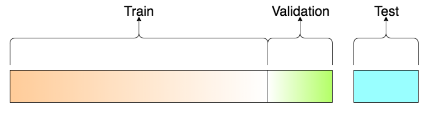
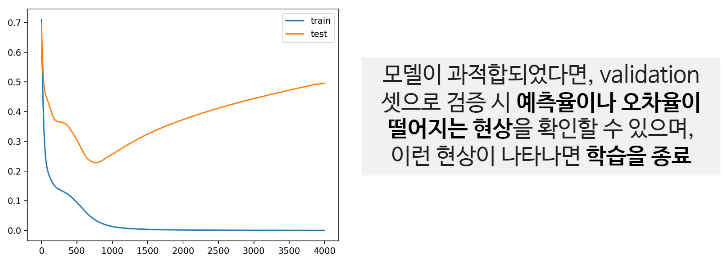

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1, stratify=y) 
#x,y의 data를 각각 test:train = 3:7로 쪼갬.

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### train_test_split() 의 인자  
**test_size** : 테스트 셋 구성의 비율. train_size계와 반대 관계. 딱봐도 0.2면 테스트 셋 2 : 트레인 셋 8. default 값은 0.25이다.  
**shuffle** : default=True. 섞을 건지 여부.  
**stratify** : default=None. classification을 다룰 때 매우 중요한 옵션값. stratify를 target지정 해주면 각각의 class 비율을 train / validation에 유지해준다. 그러니까 우리는 Y 가 세 종류인데` stratify=y`를 해서 이 세 label을 균등하게 뽑아서 test set을 만들어 준다는 거다~  이 옵션을 지정해 주지 않고 classification 문제를 다룬다면 imbalance해서 성능차이가 많이 날 수 있다고 한다.
**random_state** : 랜덤 시드

### **이제 학습할 시간**

In [ ]:
#KNN의 적용
from sklearn.neighbors import KNeighborsClassifier #KNN 불러오기
knn=KNeighborsClassifier(n_neighbors=5, p=2) #5개의 인접한 이웃, 거리측정 : 유클리디언
knn.fit(x_train, y_train) #모델 fitting 과정

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_train_pred = knn.predict(x_train) #train data의 y값 예측치
y_test_pred = knn.predict(x_test) #모델을 적용한 testdata의 y값 예측치 
print('Misclassified training samples: %d' %(y_train != y_train_pred).sum()) #예측치랑 비교해서 오분류 갯수
print('Misclassified training samples: %d' %(y_test != y_test_pred).sum()) #예측치랑 비교해서 오분류 갯수  

Misclassified training samples: 2
Misclassified training samples: 1


### **결과 분석**
성능평가 : 분류 문제는 회귀 분석과 달리 다양한 성능 평가 기준(metric)이 필요함. 평가 방법마다 장단점이 존재함  
싸이킷런에서 제공하는 분류 성능 평가 방법  


*   confusion_matrix(y_true, y_pred)
*   accuracy_score(y_true, y_pred)
*   precision_score(y_true, y_pred)
*   recall_score(y_true, y_pred)
*   fbeta_score(y_true, y_pred, beta)
*   f1_score(y_true, y_pred) 
*   roc_curve 
*   auc


In [ ]:
from sklearn.metrics import accuracy_score #정확도 계산 모듈
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred)) 


0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


###**혼합 행렬(confusion matrix)**: 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는 갯수를 나타낸 것  
**[[15  0  0]** 0을 0이라 예측한게 15개  
 **[ 0 15  0]** 1을 1이라 예측한게 15개    
 **[ 0  1 14]]** 2을 2이라 예측한게 14개, 2를 1이라 예측한게 1개   
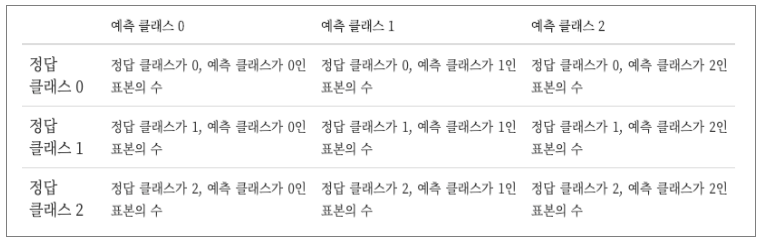   
 ### **정확도(accuracy)** : 전체샘플중맞게예측한샘플수의비율   
 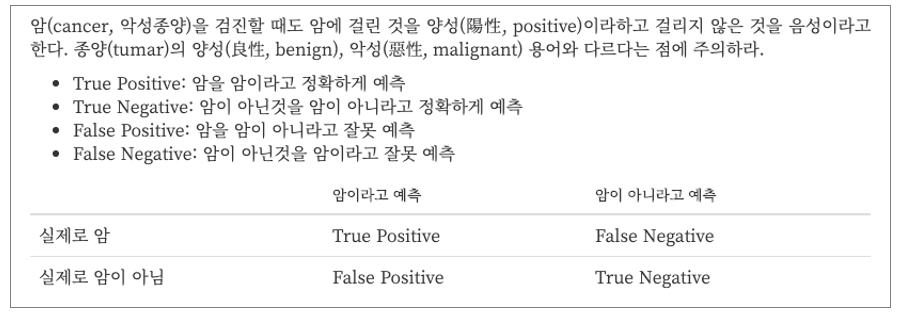  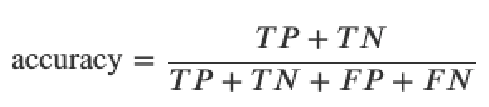   
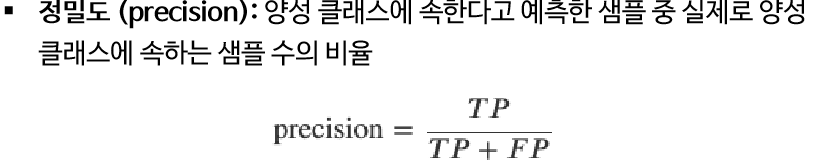  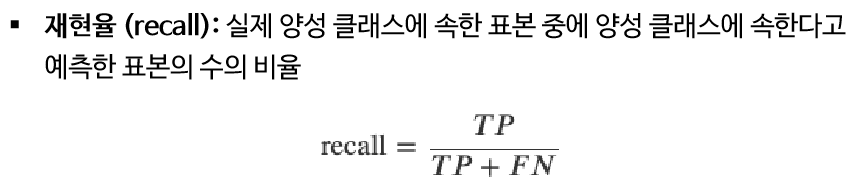

### **(옵션) 입력데이터의 표준화**  
특성 자료의 측정 단위(Scailing)에 의해 영향 받지 않도록 하는 과정.  
싸이킷런의 **StandardScaler** 클래스를 호출하여 사용.  
시험 데이터(test data)의 표준화는 학습 데이터(train data)에서 구한 특성 변수의 평균과 표준편차를 이용함.  
***표준화로 인해 데이터의 분포인 통계적 특성이 꺠지면 머신러니의 학습 저하를 일으킬 수 있다!***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)



In [ ]:
knn.fit(x_train_std,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_train_pred=knn.predict(x_train_std)
y_test_pred=knn.predict(x_test_std)
print(accuracy_score(y_test, y_test_pred))

0.9333333333333333


엥 정확도가 떨어졌다!!  
**표준화 여부는 시험 데이터의 accuracy를 점검하여 결정함**

# KNN 회귀 실습 (IMDb)


### KNN 회귀를 이용한 영화 평점 예측  
평이 좋다 vs 나쁘다 레이블로 분류하는게 아니라 실제 IMDb 등급(실수)을 예측하는 것.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance") 
#distance 옵션은 가중 평균. default="uniform" 인데 이건 단순 평균

training_points = [ 
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7],
  [0.2, 0.3, 0.9]
] #임의의 학습데이터 x = (3,3)

training_labels = [5.0, 6.8, 9.0, 4.6] #등급 y = 3
regressor.fit(training_points, training_labels) #학습

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

In [ ]:
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

predict_score = regressor.predict(unknown_points)
predict_score

array([6.03919901, 7.51523469, 6.8457845 ])